## LOAN DATA

## File Reading/ Data Ingetion

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
import warnings
warnings.filterwarnings('ignore')   


In [12]:
path = r"D:\ML\train_loan.xlsx"

## Basic Data Quality Check

In [13]:
df = pd.read_excel(path)
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2,MEDICAL,A,6000,6.92,0.10,N,3,0


In [14]:
df.sum().isnull()

id                            False
person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length             False
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_int_rate                 False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
loan_status                   False
dtype: bool

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  int64  
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(2), int64(7), object

## Drop ID column

In [17]:
df = df.drop( 'id', axis=1)


In [50]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,28,28800,RENT,0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,23,44000,RENT,7,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,22,30000,RENT,2,EDUCATION,A,5000,8.90,0.17,N,3,0


In [19]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

## Seprate X and Y

In [22]:
x = df.drop(['loan_status'],axis=1)
y = df['loan_status']

In [23]:
type(y)

pandas.core.series.Series

In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [28]:
y.value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

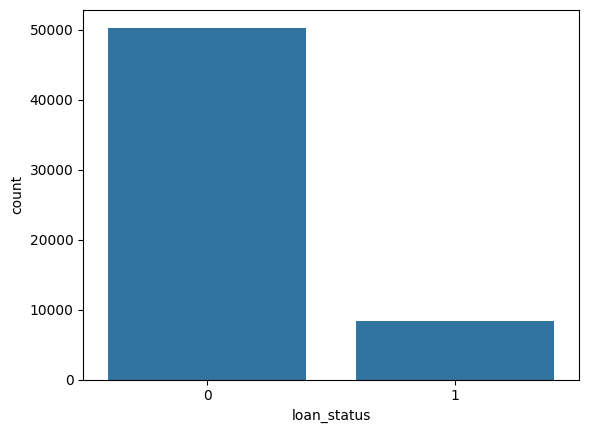

In [29]:
sns.barplot( y.value_counts() ) 

## Seprate Num and Cat Data

In [30]:
cat = x.columns[x.dtypes=='object']
num = x.columns[x.dtypes!='object']

In [31]:
print(cat)
print()
print(num)

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')


## Create Pipeline

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder , OrdinalEncoder

In [33]:
num_pipeline = Pipeline( steps=[
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())    
] )

cat_pipeline = Pipeline( steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   
    ('encoder' , OrdinalEncoder() )          
] )

In [34]:
## Compose both pipelines
preprocessor = ColumnTransformer( transformers=[
    ('num_pipeline' , num_pipeline , num ),
    ('cat_pipeline' , cat_pipeline , cat )
] )

In [35]:
preprocessor

,transformers,"[('num_pipeline', ...), ('cat_pipeline', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [36]:
## Apply on data
x_scaled = preprocessor.fit_transform(x)

In [37]:
x_scaled

array([[ 1.56620019, -0.7657678 , -1.18719967, ...,  1.        ,
         1.        ,  0.        ],
       [-0.92005729, -0.21212778,  0.32804728, ...,  3.        ,
         2.        ,  0.        ],
       [ 0.2401962 , -0.92922343,  0.8331296 , ...,  4.        ,
         0.        ,  0.        ],
       ...,
       [-0.75430679, -0.52849351,  0.58058844, ...,  1.        ,
         3.        ,  0.        ],
       [-0.92005729, -0.89758686, -0.68211735, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.5716972 ,  0.28878463, -0.68211735, ...,  5.        ,
         1.        ,  0.        ]], shape=(58645, 11))

In [38]:
## Convert into DataFrame
x_scaled = pd.DataFrame( x_scaled , columns = preprocessor.get_feature_names_out() )
x_scaled

,num_pipeline__person_age,num_pipeline__person_income,num_pipeline__person_emp_length,num_pipeline__loan_amnt,num_pipeline__loan_int_rate,num_pipeline__loan_percent_income,num_pipeline__cb_person_cred_hist_length,cat_pipeline__person_home_ownership,cat_pipeline__loan_intent,cat_pipeline__loan_grade,cat_pipeline__cb_person_default_on_file
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,3.0,1.0,1.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,2.0,3.0,2.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,2.0,4.0,0.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,3.0,5.0,1.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
58640,1.068949,1.475156,0.075506,2.836651,1.737297,0.553626,1.039036,0.0,1.0,3.0,1.0
58641,0.074446,-0.929223,-1.187200,0.140632,0.676227,2.080493,0.542655,3.0,3.0,2.0,0.0
58642,-0.754307,-0.528494,0.580588,-0.434518,1.753773,-0.100746,-0.946489,3.0,1.0,3.0,0.0
58643,-0.920057,-0.897587,-0.682117,-0.758041,-0.585854,0.117378,-0.698298,3.0,1.0,0.0,0.0


## Trning Trsting Split

In [39]:
from sklearn.model_selection import train_test_split


In [40]:
x_train , x_test , y_train , y_test = train_test_split( x_scaled , y , test_size=0.2 , random_state=42 )

In [41]:
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(46916, 11) (46916,)
(11729, 11) (11729,)


In [42]:
x_train.columns

Index(['num_pipeline__person_age', 'num_pipeline__person_income',
       'num_pipeline__person_emp_length', 'num_pipeline__loan_amnt',
       'num_pipeline__loan_int_rate', 'num_pipeline__loan_percent_income',
       'num_pipeline__cb_person_cred_hist_length',
       'cat_pipeline__person_home_ownership', 'cat_pipeline__loan_intent',
       'cat_pipeline__loan_grade', 'cat_pipeline__cb_person_default_on_file'],
      dtype='object')

In [43]:
y_train.head()

14337    0
17117    0
32590    0
55811    0
40120    0
Name: loan_status, dtype: int64

In [44]:
x_test.head()

,num_pipeline__person_age,num_pipeline__person_income,num_pipeline__person_emp_length,num_pipeline__loan_amnt,num_pipeline__loan_int_rate,num_pipeline__loan_percent_income,num_pipeline__cb_person_cred_hist_length,cat_pipeline__person_home_ownership,cat_pipeline__loan_intent,cat_pipeline__loan_grade,cat_pipeline__cb_person_default_on_file
4657,-0.754307,-0.633949,-1.187200,-0.991696,-0.882427,-0.755118,-0.450108,3.0,3.0,0.0,0.0
56440,-0.422806,-0.106673,1.085671,-0.758041,-0.688007,-0.864180,-0.450108,0.0,2.0,0.0,0.0
42117,0.737448,0.059419,-1.187200,1.937978,0.610322,1.098935,0.046274,3.0,3.0,1.0,0.0
10849,-0.920057,-0.897587,-1.187200,-0.758041,-0.028957,0.117378,-0.946489,3.0,0.0,1.0,0.0
39395,-0.091305,-0.106673,-0.934659,-0.398572,0.504874,-0.427932,1.039036,3.0,3.0,1.0,0.0


In [45]:
y_test.head()

4657     0
56440    0
42117    1
10849    0
39395    0
Name: loan_status, dtype: int64

## FIT MODEL

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost 
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [47]:
x_train.shape

(46916, 11)

## Fit Models

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
LR = LogisticRegression()
LR.fit( x_train , y_train )
cvs_LR = cross_val_score( LR , x_train , y_train , cv=5 ).mean()
cvs_LR 
DT = DecisionTreeClassifier(max_depth=6)
DT.fit(x_train , y_train)
cvs_DT = cross_val_score( DT , x_train , y_train , cv=5 ).mean()
cvs_DT
RF = RandomForestClassifier(n_estimators=100 , max_depth=6)
RF.fit(x_train , y_train)
cvs_RF = cross_val_score( RF , x_train , y_train , cv=5 ).mean()
cvs_RF
GB = GradientBoostingClassifier( max_depth=6)
GB.fit(x_train , y_train)
cvs_GB = cross_val_score( GB , x_train , y_train , cv=5 ).mean()
cvs_GB
XGB = XGBClassifier( max_depth=6  )
XGB.fit(x_train , y_train)
cvs_XGB = cross_val_score( XGB , x_train , y_train , cv=5 ).mean()
cvs_XGB
KNN = KNeighborsClassifier( n_neighbors=5 )
KNN.fit(x_train , y_train)
cvs_KNN = cross_val_score( KNN , x_train , y_train , cv=5 ).mean()
cvs_KNN
svm = SVC()
svm.fit(x_train , y_train)
cvs_svm = cross_val_score( svm , x_train , y_train , cv=5 ).mean()
cvs_svm



np.float64(0.9281695397137211)

In [51]:
print('cvs_LR ' ,  cvs_LR.mean())
print('cvs_DT ' ,  cvs_DT.mean())
print('cvs_RF ' ,  cvs_RF.mean())
print('cvs_GB ' ,  cvs_GB.mean())
print('cvs_XGB ' ,  cvs_XGB.mean())
print('cvs_KNN ' ,  cvs_KNN.mean())
print('cvs_svm ' ,  cvs_svm.mean())
 

cvs_LR  0.894897246648475
cvs_DT  0.9462656543881078
cvs_RF  0.9412354438506307
cvs_GB  0.9513172641130833
cvs_XGB  0.9498678501932399
cvs_KNN  0.928403994945058
cvs_svm  0.9281695397137211


### Evaluation of models

In [52]:
from sklearn.metrics import (classification_report , confusion_matrix , f1_score)

In [53]:
def evaluate(model   ,  x , y):
    pred  =  model.predict(x)
    f1 =  f1_score(y ,  pred , average  = 'macro')
    cr  =  classification_report(y  , pred)
    cf  =  confusion_matrix(y ,  pred)
 
    cv  =  cross_val_score( model  , x ,  y ,  n_jobs= -1 , scoring= 'f1_macro' , cv  =  5 )
   
    print('cv' ,cv.mean())
    print(f'f1-->{f1}')
    print(cr)
    print(sns.heatmap(cf  ,  annot  = True  , fmt  = 'd'))
 

## Logistic Regratioon Evaluation

cv 0.7379392045340551
f1-->0.7453252556066297
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10087
           1       0.75      0.43      0.55      1642

    accuracy                           0.90     11729
   macro avg       0.83      0.70      0.75     11729
weighted avg       0.89      0.90      0.89     11729

Axes(0.125,0.11;0.62x0.77)


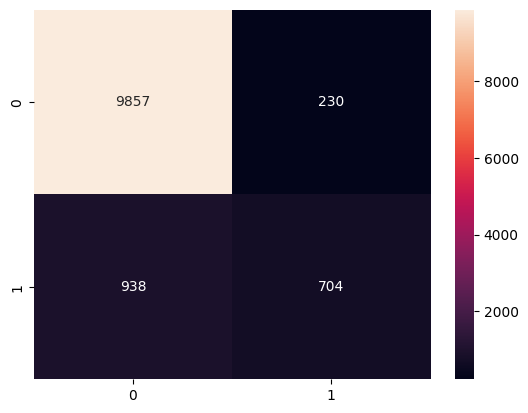

In [54]:
evaluate( LR  , x_test , y_test )

cv 0.7379392045340551
f1-->0.7453252556066297
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10087
           1       0.75      0.43      0.55      1642

    accuracy                           0.90     11729
   macro avg       0.83      0.70      0.75     11729
weighted avg       0.89      0.90      0.89     11729

Axes(0.125,0.11;0.62x0.77)


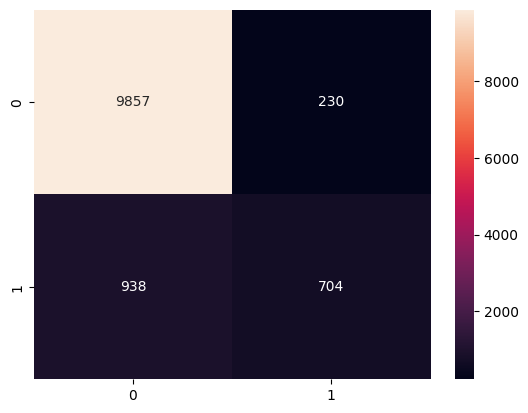

In [55]:
## Test Evaluation 
evaluate( LR  , x_test , y_test )

## DT

cv 0.8751511236366403
f1-->0.8779251234257952
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     40208
           1       0.95      0.67      0.79      6708

    accuracy                           0.95     46916
   macro avg       0.95      0.83      0.88     46916
weighted avg       0.95      0.95      0.94     46916

Axes(0.125,0.11;0.62x0.77)


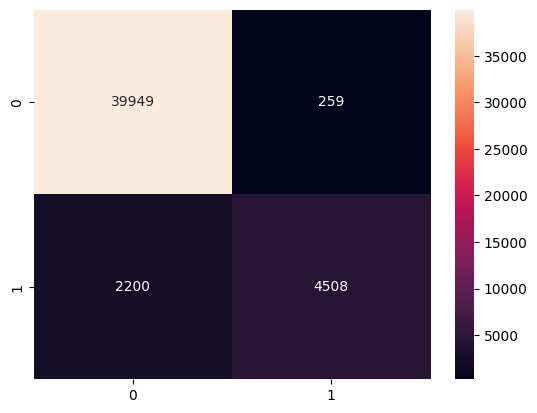

In [56]:
evaluate( DT  , x_train , y_train )

## GB

cv 0.8898775685040627
f1-->0.9110993704141077
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     40208
           1       0.96      0.76      0.84      6708

    accuracy                           0.96     46916
   macro avg       0.96      0.88      0.91     46916
weighted avg       0.96      0.96      0.96     46916

Axes(0.125,0.11;0.62x0.77)


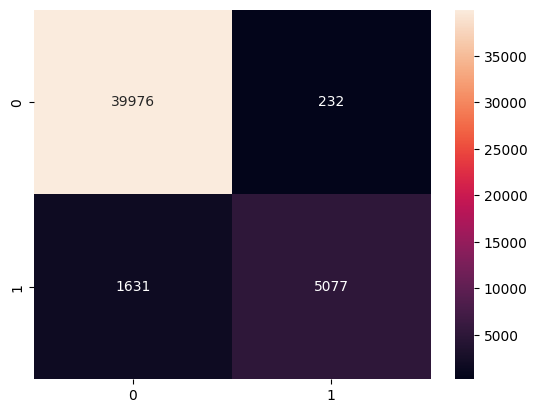

In [57]:
evaluate(GB  , x_train , y_train )

cv 0.8847712387798904
f1-->0.89190760152314
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.91      0.73      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729

Axes(0.125,0.11;0.62x0.77)


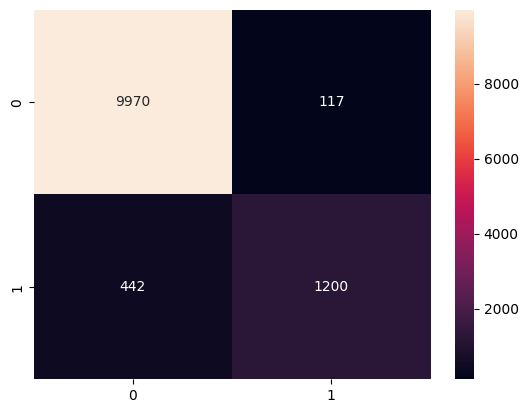

In [58]:
evaluate( GB  , x_test , y_test )

cv 0.8866343846603943
f1-->0.8929800892886239
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.90      0.74      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729

Axes(0.125,0.11;0.62x0.77)


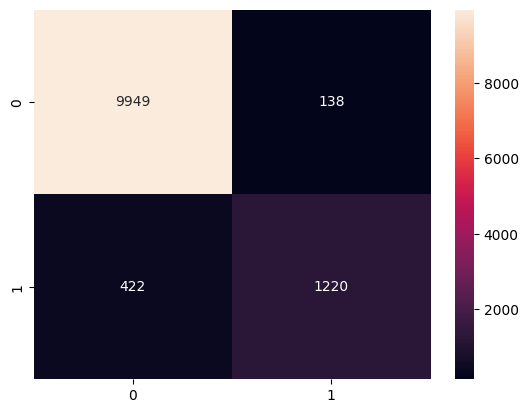

In [59]:
evaluate( XGB  , x_test , y_test )

cv 0.8866343846603943
f1-->0.8929800892886239
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.90      0.74      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729

Axes(0.125,0.11;0.62x0.77)


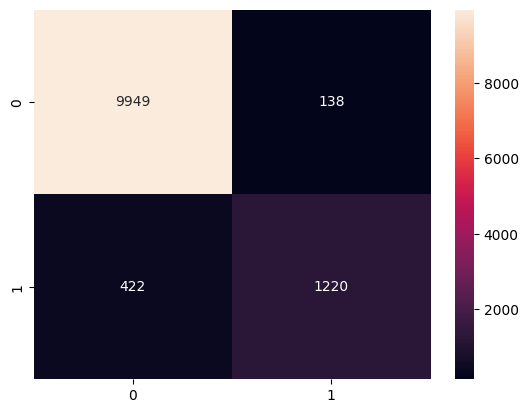

In [60]:
evaluate( XGB  , x_test , y_test )

cv 0.8366796709585982
f1-->0.8733236924392934
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     40208
           1       0.89      0.69      0.78      6708

    accuracy                           0.94     46916
   macro avg       0.92      0.84      0.87     46916
weighted avg       0.94      0.94      0.94     46916

Axes(0.125,0.11;0.62x0.77)


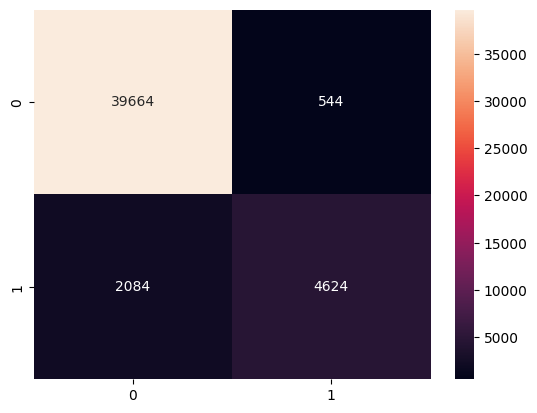

In [61]:
evaluate( KNN  , x_train , y_train )

cv 0.8111310675089616
f1-->0.8428476181258094
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10087
           1       0.83      0.64      0.72      1642

    accuracy                           0.93     11729
   macro avg       0.89      0.81      0.84     11729
weighted avg       0.93      0.93      0.93     11729

Axes(0.125,0.11;0.62x0.77)


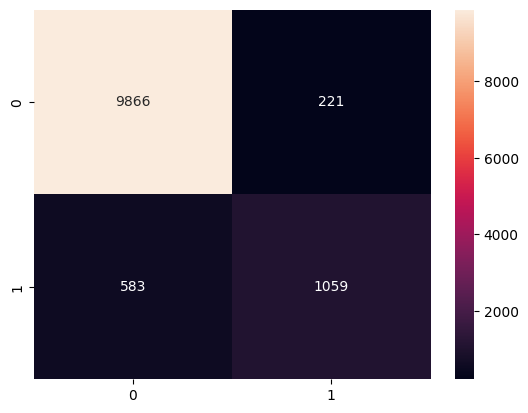

In [62]:
evaluate( KNN , x_test , y_test )

cv 0.8309766041837985
f1-->0.8377543118181754
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     40208
           1       0.87      0.61      0.71      6708

    accuracy                           0.93     46916
   macro avg       0.90      0.80      0.84     46916
weighted avg       0.93      0.93      0.93     46916

Axes(0.125,0.11;0.62x0.77)


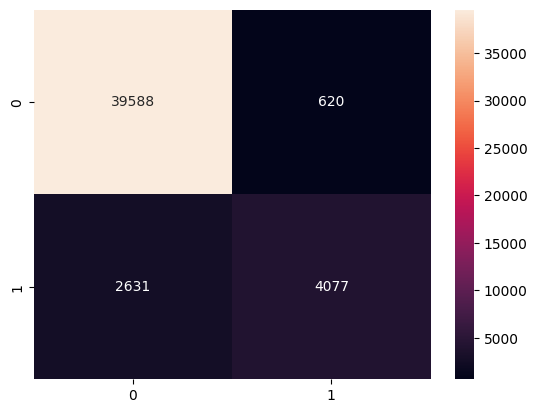

In [63]:
evaluate( svm  , x_train , y_train )

cv 0.8138786072234365
f1-->0.8324042480903591
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10087
           1       0.85      0.60      0.70      1642

    accuracy                           0.93     11729
   macro avg       0.90      0.79      0.83     11729
weighted avg       0.93      0.93      0.92     11729

Axes(0.125,0.11;0.62x0.77)


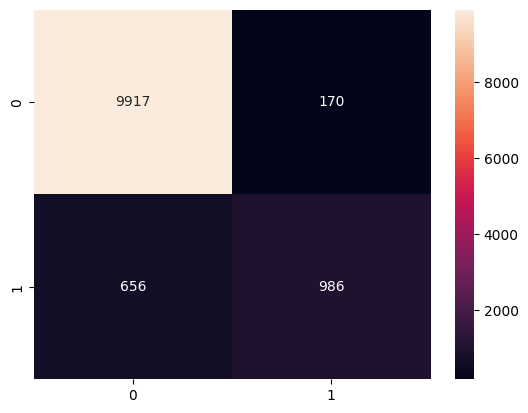

In [64]:
evaluate( svm  , x_test , y_test )

## XGB is giving best performance
- Refer this model for loan prediction system

## Predict Data For Sample File

In [65]:
sample = pd.read_excel(r"D:\ML\test_loan.xlsx")

In [66]:
sample.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [67]:
preprocessor

,transformers,"[('num_pipeline', ...), ('cat_pipeline', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [68]:
sample_scaled = preprocessor.fit_transform(sample)

In [69]:
sample_scaled

array([[-0.75700653,  0.13014081, -0.43612143, ...,  2.        ,
         5.        ,  0.        ],
       [-0.25971541,  0.8415031 ,  0.33940391, ...,  4.        ,
         2.        ,  1.        ],
       [-0.25971541, -0.8973825 ,  0.08089546, ...,  5.        ,
         4.        ,  1.        ],
       ...,
       [ 3.88437726, -0.10697995, -1.21164676, ...,  4.        ,
         0.        ,  0.        ],
       [-0.92277024, -0.73930199, -0.17761298, ...,  4.        ,
         3.        ,  1.        ],
       [ 0.56910312, -0.50218123,  0.33940391, ...,  0.        ,
         1.        ,  0.        ]], shape=(39098, 11))

In [70]:
## I Have to convert it into DataFrame
sample_scaled = pd.DataFrame( sample_scaled , columns = preprocessor.get_feature_names_out() )
sample_scaled

,num_pipeline__person_age,num_pipeline__person_income,num_pipeline__person_emp_length,num_pipeline__loan_amnt,num_pipeline__loan_int_rate,num_pipeline__loan_percent_income,num_pipeline__cb_person_cred_hist_length,cat_pipeline__person_home_ownership,cat_pipeline__loan_intent,cat_pipeline__loan_grade,cat_pipeline__cb_person_default_on_file
0,-0.757007,0.130141,-0.436121,2.824250,1.688238,2.187295,-0.940719,3.0,2.0,5.0,0.0
1,-0.259715,0.841503,0.339404,0.134238,0.668431,-0.650135,-0.449573,0.0,4.0,2.0,1.0
2,-0.259715,-0.897382,0.080895,-0.941767,2.161719,-0.322739,-0.940719,3.0,5.0,4.0,1.0
3,0.900631,-0.370447,-0.177613,-0.403765,-0.583149,-0.213607,0.287147,3.0,0.0,0.0,0.0
4,-0.259715,0.999584,0.856421,1.030908,1.873657,-0.104475,-0.449573,0.0,2.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
39093,-0.922770,-0.865766,-0.694630,-1.121101,-0.096423,-0.650135,-0.449573,0.0,0.0,1.0,0.0
39094,-0.922770,-0.423141,0.339404,-0.403765,-1.533423,-0.104475,-0.695146,0.0,1.0,0.0,0.0
39095,3.884377,-0.106980,-1.211647,1.030908,-1.043386,0.986844,4.707466,0.0,4.0,0.0,0.0
39096,-0.922770,-0.739302,-0.177613,0.851574,1.641883,2.514691,-0.449573,0.0,4.0,3.0,1.0


In [71]:
## XGB model
predictions = XGB.predict( sample_scaled )

In [73]:
predictions

array([1, 0, 1, ..., 0, 0, 1], shape=(39098,))

In [74]:
sample['predictions'] = predictions

In [77]:
sample.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,predictions
0,58645,23,69000,RENT,3,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2,1
1,58646,26,96000,MORTGAGE,6,PERSONAL,C,10000,12.68,0.10,Y,4,0
2,58647,26,30000,RENT,5,VENTURE,E,4000,17.19,0.13,Y,2,1
3,58648,33,50000,RENT,4,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7,0
4,58649,26,102000,MORTGAGE,8,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4,0
